![UVA Grounds](https://giving.virginia.edu/sites/default/files/2019-02/jgi-teaser-image.jpg)

The UVA campus is known for its Jeffersonian architecture and place in U.S. history as a model for college and university campuses throughout the country. Throughout its history, the University of Virginia has won praises for its unique Jeffersonian architecture.

This project attempts to build an image recognition system to classify different buildlings/landmarks on campus. 

In [ ]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

# Step 2: Process the  Dataset
This dataset will be the one you we will benchmark.

In [ ]:
# Download dataset from Firebase
!wget https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media&token=e1403951-30d6-42b8-ba4e-394af1a2ddb7

--2022-12-01 04:00:50--  https://firebasestorage.googleapis.com/v0/b/uva-landmark-images.appspot.com/o/dataset.zip?alt=media
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 74.125.24.95, 172.217.194.95, 142.251.10.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|74.125.24.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397174132 (379M) [application/zip]
Saving to: ‘dataset.zip?alt=media’

dataset.zip?alt=med 100%[===================>] 378.77M  24.3MB/s    in 18s     

2022-12-01 04:01:09 (21.0 MB/s) - ‘dataset.zip?alt=media’ saved [397174132/397174132]



In [ ]:
# Extract content
!unzip "/content/dataset.zip?alt=media"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Rotunda/0000010694.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010694.jpg  
  inflating: dataset/Rotunda/0000010680.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010680.jpg  
  inflating: dataset/Rotunda/0000010858.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010858.jpg  
  inflating: dataset/Rotunda/0000010870.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010870.jpg  
  inflating: dataset/Rotunda/0000010864.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010864.jpg  
  inflating: dataset/Rotunda/0000010865.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010865.jpg  
  inflating: dataset/Rotunda/0000010871.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010871.jpg  
  inflating: dataset/Rotunda/0000010859.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010859.jpg  
  inflating: dataset/Rotunda/0000010681.jpg  
  inflating: __MACOSX/dataset/Rotunda/._0000010681.jpg  
  inflating: dataset/R

In [ ]:
from sklearn.datasets import load_files
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm

data_dir = "/content/dataset/"
batch_size = 128;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 200;
img_width = 200;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 14286 files belonging to 18 classes.
Using 11429 files for training.
Found 14286 files belonging to 18 classes.
Using 2857 files for validation.


In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

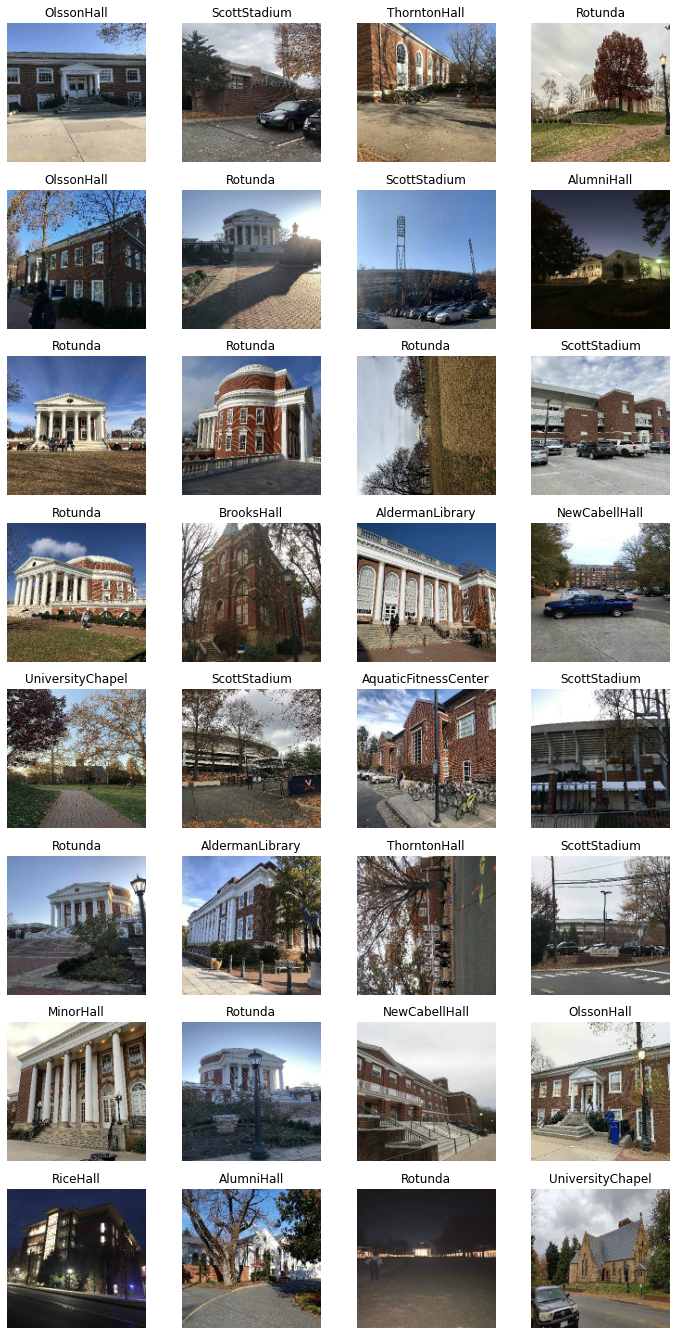

In [ ]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['AcademicalVillage', 'AldermanLibrary', 'AlumniHall', 'AquaticFitnessCenter',
  'BavaroHall', 'BrooksHall', 'ClarkHall', 'MadisonHall', 'MinorHall', 'NewCabellHall',
  'NewcombHall', 'OldCabellHall', 'OlssonHall', 'RiceHall', 'Rotunda', 'ScottStadium',
  'ThorntonHall', 'UniversityChapel']

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)


# Creating CNN architecture
To get started, check out the one in CNN notebook  (i.e. use one similar to LeNet-5 or AlexNet).

1.   How many layers does it have?
2.   Why do you decide on a certain number nodes per layer?
3.   Which activation functions do you choose?
4.   How many parameters does it has in total?




Run this cell if you are getting nan for loss

In [ ]:
keras.backend.clear_session()

In [ ]:
myModel  = keras.models.Sequential([
    keras.layers.Conv2D(filters=100, kernel_size=(13,13), strides=(4,4), activation='relu', input_shape=(img_height,img_width,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=200, kernel_size=(7,7), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=250, kernel_size=(4,4), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=250, kernel_size=(4,4), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=250, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(18, activation='softmax')
])

myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 100)       50800     
                                                                 
 batch_normalization (BatchN  (None, 35, 35, 100)      400       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 200)       980200    
                                                                 
 batch_normalization_1 (Batc  (None, 17, 17, 200)      800       
 hNormalization)                                                 
                                                        

Begin Training

In [ ]:
myEpochs = 15
# "nadam"
#keras.optimizers.SGD(momentum=0.02)
myOptimizer = keras.optimizers.Adam(learning_rate=0.001) #TODO
# "sparse_categorical_crossentropy"
# keras.losses.SparseCategoricalCrossentropy()
myLoss = keras.losses.SparseCategoricalCrossentropy() #TODO
#keras.metrics.MeanSquaredError(), keras.metrics.AUC(), keras.metrics.Accuracy()
myMetrics = "accuracy"
myModel.compile(loss= myLoss, optimizer = myOptimizer, metrics = myMetrics)
history = myModel.fit(train_ds,
                      validation_data=validation_ds,
                      epochs = myEpochs)

Epoch 1/15
90/90 [==============================] - 28s 186ms/step - loss: 3.4688 - accuracy: 0.1613 - val_loss: 3.9563 - val_accuracy: 0.0980
Epoch 2/15
90/90 [==============================] - 16s 174ms/step - loss: 2.2847 - accuracy: 0.3016 - val_loss: 3.8673 - val_accuracy: 0.1033
Epoch 3/15
90/90 [==============================] - 16s 164ms/step - loss: 1.9138 - accuracy: 0.4216 - val_loss: 2.7319 - val_accuracy: 0.2587
Epoch 4/15
90/90 [==============================] - 16s 166ms/step - loss: 1.5853 - accuracy: 0.5266 - val_loss: 1.7030 - val_accuracy: 0.4904
Epoch 5/15
90/90 [==============================] - 16s 166ms/step - loss: 1.3523 - accuracy: 0.5991 - val_loss: 3.4951 - val_accuracy: 0.2433
Epoch 6/15
90/90 [==============================] - 16s 165ms/step - loss: 1.1049 - accuracy: 0.6686 - val_loss: 2.8583 - val_accuracy: 0.3465
Epoch 7/15
90/90 [==============================] - 16s 165ms/step - loss: 0.9211 - accuracy: 0.7273 - val_loss: 3.2440 - val_accuracy: 0.3336

**Please note that I am basing my answers off of the best graph I got when running my model but I needed to re run it a couple times for confusion matrix
here is the values I am basing my answers off of:**

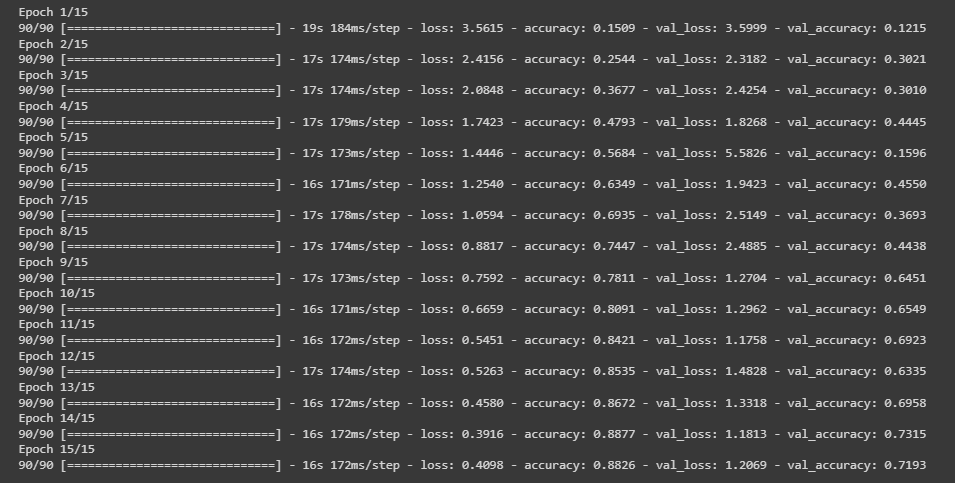

1.   How many layers does it have?

This model closely follows an AlexNet model. The number of layers this model has a layer for the input data, 5 layers of convolution and in between all of those layers we have pooling and batch normalization as well. This results in a total layer count of

1 input layer

5 convolution layers

3 pooling layers

and 3 flattened layers

for a total of 12 layers in this model

2.   Why do you decide on a certain number nodes per layer?

The most important nodes per layer would be the input layer which needed to have an input shape of img_height, img_width, 3 and the output must be the size of the classes which would be 18. Most inner layers the nodes I picked for them were kind of arbitrary. I picked values low and higher than what I have now but I did not want to overstep into overfitting data so I went with a middle ground of maps ranging from 100 to 250 with a max node count at 2000 when flattening. The current model resulted in an accuracy of about 0.88 with a validation accuracy of 0.71 which is fairly low but passing the 0.65 threshold. I could increase this accuracy and validation accuracy by tweaking the nodes and hyperparamters of the layers or increasing the epoch count above 15, but the threshold is passed for now. If I end up changing it later on I will update this section accordingly.

3.   Which activation functions do you choose?

Softmax must be the output fucntion because this is a multiclass classification problem. Every hidden layer that I used just used relu as their activiation function so we can have a quicker run time.


4.   How many parameters does it has in total?

Total params: 11,938,468

Trainable params: 11,936,368

Non-trainable params: 2,100


Assessing Performance and Validation

Training and validation loss

In [ ]:
def plot_loss_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

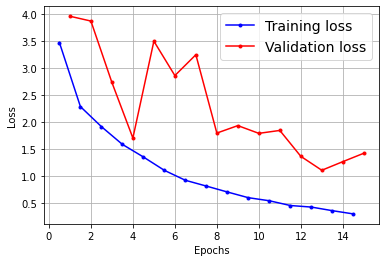

In [ ]:
plot_loss_learning_curves(history.history["loss"], history.history["val_loss"])

**Best loss graph I got was this:**

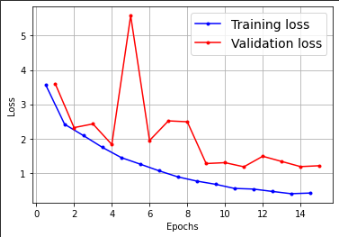

The training loss looks okay. The Validation loss seems iffy but I think it is also okay. My best guess on why theres some jumps in validation loss is becasue the model I created did not generalize well enough and it resulted in this jump but as we can see the trend is generally going down so it should still be okay.

In [ ]:
def plot_accuracy_learning_curves(accuracy, val_accuracy):
    plt.plot(np.arange(len(accuracy)) + 0.5, accuracy, "b.-", label="Training accuracy")
    plt.plot(np.arange(len(val_accuracy)) + 1, val_accuracy, "r.-", label="Validation accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.grid(True)

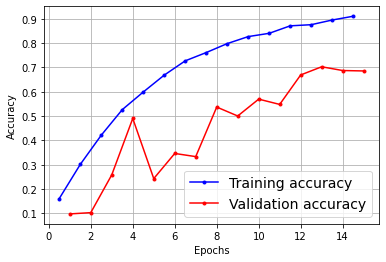

In [ ]:
plot_accuracy_learning_curves(history.history["accuracy"], history.history["val_accuracy"])

**accuraccy graph I got alongside the loss graph:**

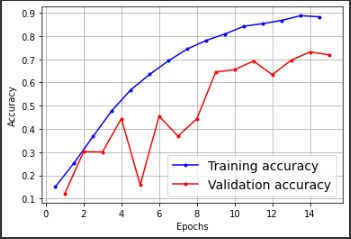

This also looks fine. likewise with loss, validation accuracy must have not generalized well at some points but the general trend is that it is going up

Convolution Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# y_pred = predict(train_ds)
# y_test = validation_ds

In [ ]:
y_pred = []
y_true = []

for image, label in train_ds:
  y_true.append(label)
  predict = myModel.predict(image)
  y_pred.append(np.argmax(predict, axis=-1))

true_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

2/2 [==============================] - 0s 188ms/step


In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

In [ ]:
print(cm)

[[ 181    1    0   12    1    0    1    0    2    1    0   30    1    0
    75   15    9    0]
 [   1  489    0    4    7    0    0    2    6    1    5   30    3    1
    23   20    2    0]
 [   9    2  196    4    1    0    0    2    0    0    0   33    7    2
    79   37    1    2]
 [   0    0    0  387    0    0    0    1    1    5    6    2    6    1
     1   20    6    2]
 [   0    0    0    8  136    0    3    0    2    5    5    2    6    2
     3    1    0    0]
 [   5    0    0   35    3  190    1    3    5   26    9    7   26    1
     3    8    7    1]
 [   4    8    1   12    0    2  405    5   28   10   18   54   25    3
    58   13   27    0]
 [   1    6    0   17   11    0    0  150   16    0    2   12   23    0
    27   24   13    0]
 [   3   37    0    5   10    0    3    3  400    4   18   57   24    6
    28   13    5    0]
 [   0    4    0   18    4    1    1    1    1  420    9   12    3    1
    14   12    4    1]
 [   0    0    0   33    6    1    0    0    4   1

**Best confusion matrix:**

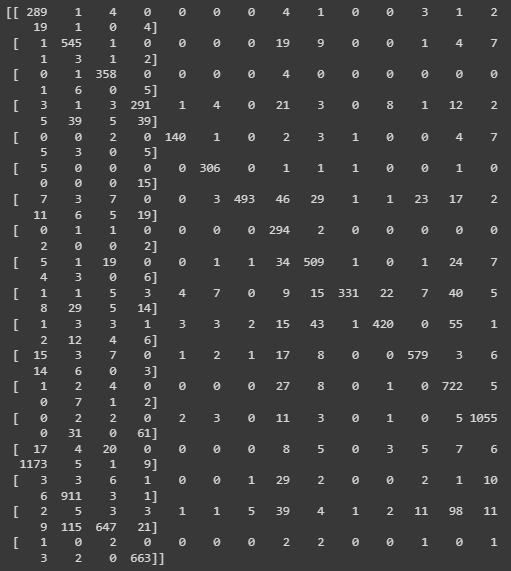

From the looks of the confusion matrix it looks okay. The way it is organized shows that label 0 was predicted 289 times correctly, label 1 was predicted 545 times correctly, etc. I think a take away from this is that the labels are being predicted fairly well in comparison to the photos which results in the confusion matrix having this line down the main diagonal. (not sure why it spreads out like this though)

# Pre-trained Network with Transfer Learning
Lets assess my model to pretrained models from keras

Make sure you report the design of this architecture by answer the same questions 1-4 in Step 3.



In [ ]:
from keras.applications import InceptionV3
#base_model = keras.applications.InceptionV3(weights="imagenet", include_top=False)
base_model = keras.applications.EfficientNetB0(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(18, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)
model.summary()

16705208/16705208 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                             

1.   How many layers does it have?
2.   Why do you decide on a certain number nodes per layer?
3.   Which activation functions do you choose?
4.   How many parameters does it has in total?

Efficent Net B0 has 237 layers that encompass convolution, batch normalization, activation, padding, rescaling, dropout, depthwise convolution, and multiplying. Essentially B0 doesnt have as many sub blocks or layers as its newer models. It has a top-1 accuracy of 77.1% while for example B6 has an 84% top-1 accuracy. B0 has a little over 8 times less parameters than B6 but B0 is much faster to run in comparison as a result. The hint tells us to use softmax as the output function but B0 uses softmax as defualt if nothing is passed in as well. The total parameters are lower than my model, its about 4 million. This means that the model that is pretrained uses the nodes more efficiently than I did in step 3.

part 1: Freeze the pre-train weights and only train the top layer
part 2: Train the entire network with much smaller learning rate (adapt the model to UVA data, but avoid destroying the transfered weights).



In [ ]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=10)

Epoch 1/10
90/90 [==============================] - 42s 302ms/step - loss: 0.9575 - accuracy: 0.7336 - val_loss: 0.5629 - val_accuracy: 0.8540
Epoch 2/10
90/90 [==============================] - 26s 283ms/step - loss: 0.4473 - accuracy: 0.8810 - val_loss: 0.4628 - val_accuracy: 0.8796
Epoch 3/10
90/90 [==============================] - 26s 282ms/step - loss: 0.3596 - accuracy: 0.9099 - val_loss: 0.4354 - val_accuracy: 0.8901
Epoch 4/10
90/90 [==============================] - 27s 286ms/step - loss: 0.3271 - accuracy: 0.9199 - val_loss: 0.4159 - val_accuracy: 0.8992
Epoch 5/10
90/90 [==============================] - 26s 279ms/step - loss: 0.3004 - accuracy: 0.9285 - val_loss: 0.4076 - val_accuracy: 0.8999
Epoch 6/10
90/90 [==============================] - 26s 281ms/step - loss: 0.2836 - accuracy: 0.9337 - val_loss: 0.4020 - val_accuracy: 0.8992
Epoch 7/10
90/90 [==============================] - 26s 279ms/step - loss: 0.2716 - accuracy: 0.9373 - val_loss: 0.3928 - val_accuracy: 0.9020

In [ ]:
# Phase 2 code here
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=15)

Epoch 1/15
90/90 [==============================] - 106s 1s/step - loss: 0.5534 - accuracy: 0.8473 - val_loss: 0.3755 - val_accuracy: 0.9009
Epoch 2/15
90/90 [==============================] - 93s 1s/step - loss: 0.1463 - accuracy: 0.9677 - val_loss: 0.2671 - val_accuracy: 0.9359
Epoch 3/15
90/90 [==============================] - 93s 1s/step - loss: 0.0774 - accuracy: 0.9852 - val_loss: 0.2390 - val_accuracy: 0.9429
Epoch 4/15
90/90 [==============================] - 93s 1s/step - loss: 0.0503 - accuracy: 0.9911 - val_loss: 0.2401 - val_accuracy: 0.9436
Epoch 5/15
90/90 [==============================] - 93s 1s/step - loss: 0.0363 - accuracy: 0.9946 - val_loss: 0.2346 - val_accuracy: 0.9457
Epoch 6/15
90/90 [==============================] - 92s 1s/step - loss: 0.0277 - accuracy: 0.9959 - val_loss: 0.2341 - val_accuracy: 0.9447
Epoch 7/15
90/90 [==============================] - 93s 1s/step - loss: 0.0220 - accuracy: 0.9968 - val_loss: 0.2314 - val_accuracy: 0.9482
Epoch 8/15
90/90 [=

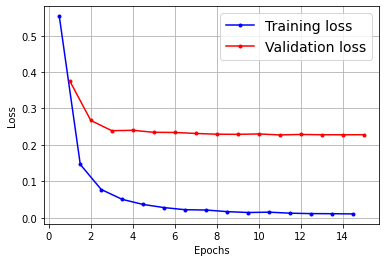

In [ ]:
plot_loss_learning_curves(history.history["loss"], history.history["val_loss"])

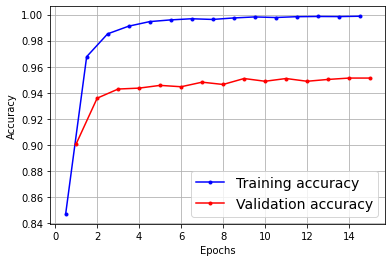

In [ ]:
plot_accuracy_learning_curves(history.history["accuracy"], history.history["val_accuracy"])

In [ ]:
y_pred = []
y_true = []

for image, label in train_ds:
  y_true.append(label)
  predict = model.predict(image)
  y_pred.append(np.argmax(predict, axis=-1))

true_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

2/2 [==============================] - 2s 409ms/step


In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

In [ ]:
print(cm)

[[ 329    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0  594    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0  375    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0  438    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0  173    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0  330    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0  673    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0  302    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0  616    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  505    0    1    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    

The model I made got outclassed hard. Essentially all of the classes I had from my neural network had errors in predicting but it looks like EfficientNetB0 was able to make predictions for some classes almost 100% correctly every time. It looks like the model made one wrong guess on the Rotunda and Newcomb hall which were the worst performing classes of this model. It is possible I could make the learning rate smaller to make predictions more accurate but 2 wrong predictions is very good in comparison to the model I created. As a result the pretrained model had a validation accuracy of 95% which is just barely above the 94% threshold i was hoping for

# Reflection


This codeathon explored the application of CNNs as well as making it interesting about how neural networks are able to predict images to their corresponding places. Initially, we started out by creating our own CNN architecture. The architecture I used consisted of using an AlexNet hybrid that used similar architecture to AlexNet but with modified parameters. I tried quite a few maps but could not find any that surpassed the AlexNet architecture. I eventually settled on picking maps and filters that were resonable so they did not take a super long time to compute. The validation accuracy ended up making it to 0.71 which does pass the threshold for creating my own model. EfficientNetB0 blew my model out of the water by having a validation accuracy of 0.91 which when plotting out on a confusion matrix looks like almost all points are predicted correctly down the main diagonal. A lot of my time I spent looking around in keras application documentation. I tried making my own architecture from scratch but eventually settled on adapting my architecure with AlexNet architecture. I also used the colab notebook to help me decide on how to do step 4. Xception was a good baseline but when I tried InceptionV3 it was not working well at all so I decided to use EfficientNetB0 instead which gave me more promising results. Overall, this was not a super difficult codeathon but it was most definitely the most computation heavy, I spent a lot of my time waiting for computations to complete running.